# AML 22-23 S2W8 Lecture Dimensionality Reduction with PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,6)}
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Generation of Synthetic Data (100x4, Some Correlated Features)

You don't need to fully understand the code! All that matters is that we create a small synthetic dataset with some random data, with some of the features linearly correlated (with some noise). The data has to be mean-centered (i.e., mean=0); scaling not required.

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
X = rng.normal(0, 1, (100, 4))

In [ ]:
# some dependencies
# x2 = 3x0 - 2x1 + e
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + rng.normal(0, 0.1, 100)
# x3 = 1.5x0 - 0.5x1 + e
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + rng.normal(0, 0.1, 100)
# it has to be mean-centered
X = X - X.mean()
# X = StandardScaler().fit_transform(X)

In [ ]:
df = pd.DataFrame(X, columns=['x0', 'x1', 'x2', 'x3'])
df.head()

,x0,x1,x2,x3
0,1.694956,0.331061,4.362881,2.415176
1,1.798461,-1.046375,7.376543,3.217455
2,-0.172316,0.341502,-1.123284,-0.319590
3,0.691941,0.052578,2.006296,0.988201
4,1.424982,-0.274255,4.646603,2.239856


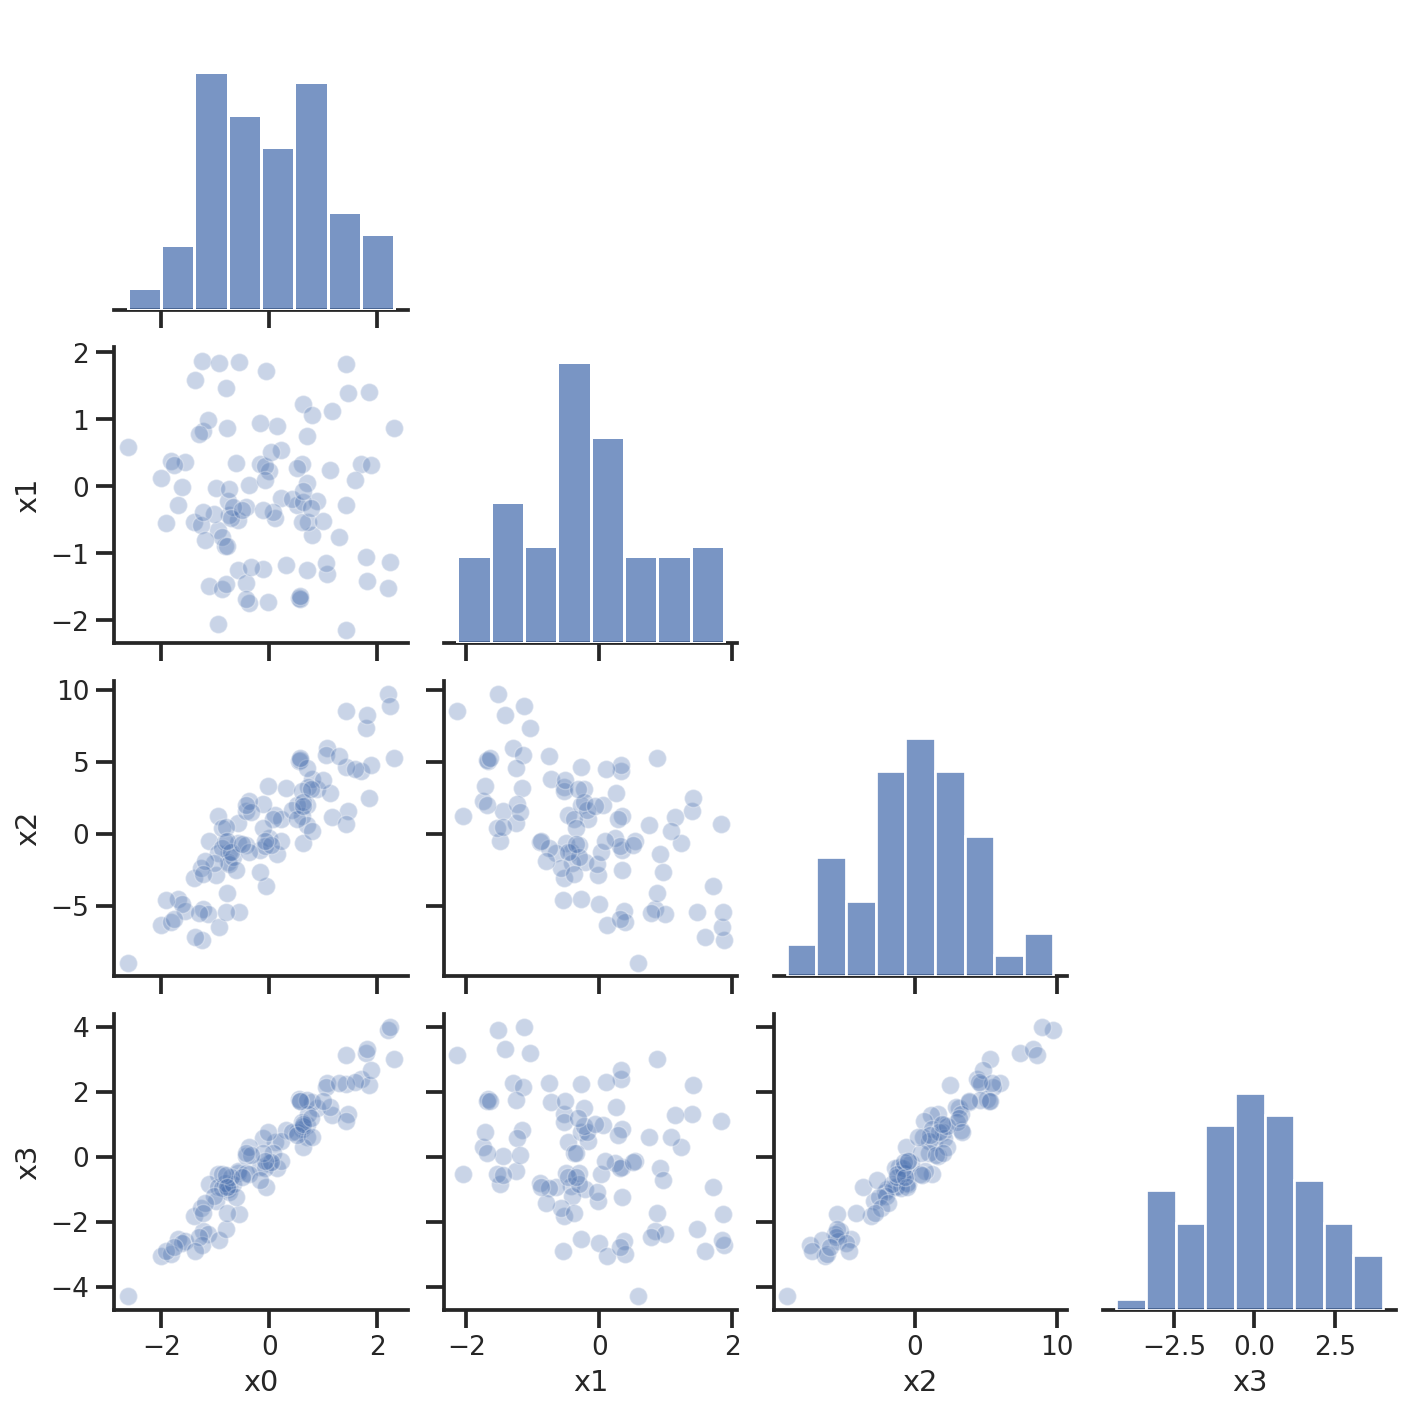

In [ ]:
g = sns.pairplot(df, corner=True, plot_kws=dict(alpha=0.3));

I'll take the `x3` against `x0` pair forward for the illustration of PCA with a simple 2D dataset.

## A 2D Correlated Dataset

In [ ]:
X = df[['x3', 'x0']]
X = X.set_axis(['x', 'y'], axis=1)
X.head()

,x,y
0,2.415176,1.694956
1,3.217455,1.798461
2,-0.319590,-0.172316
3,0.988201,0.691941
4,2.239856,1.424982


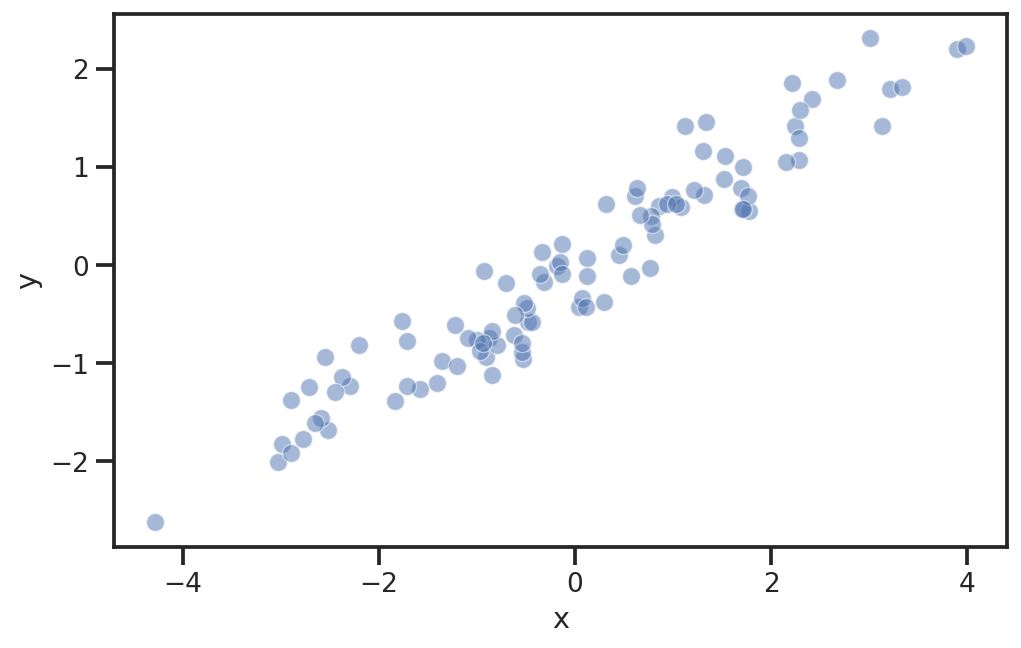

In [ ]:
ax = sns.scatterplot(data=X, x='x', y='y', alpha=0.5);
ax.set_aspect('equal')

## What Would Be a Good 1D Projection of the 2D Dataset?

Think of a line to place in the graph on which all data points are projected into. If the metaphor helps, imagining shining a light from the outside of the graph; the shadows on the line are the projected values of the data points.

In [ ]:
xlim = (-4, +4)

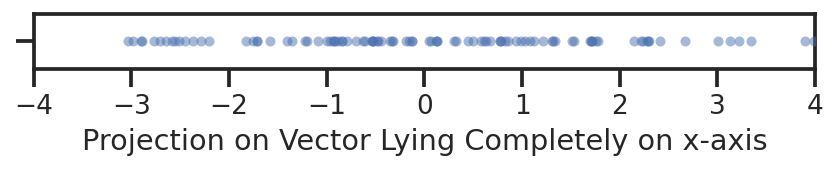

In [ ]:
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=X['x'], jitter=False, alpha=0.5, ax=ax);
ax.set_xlim(xlim)
ax.set_xlabel('Projection on Vector Lying Completely on x-axis');

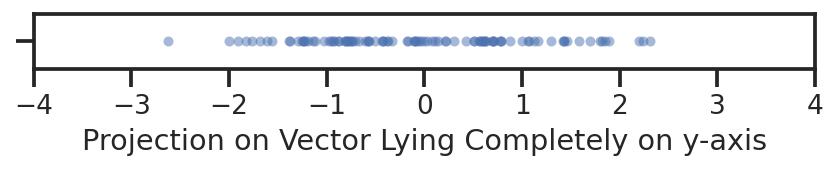

In [ ]:
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=X['y'], jitter=False, alpha=0.5, ax=ax);
ax.set_xlim(xlim)
ax.set_xlabel('Projection on Vector Lying Completely on y-axis');

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[-2.96610862],
       [-3.70537145],
       [ 0.34073234],
       [-1.22572284],
       [-2.67603788]])

In [ ]:
X.iloc[:5]

,x,y
0,2.415176,1.694956
1,3.217455,1.798461
2,-0.319590,-0.172316
3,0.988201,0.691941
4,2.239856,1.424982


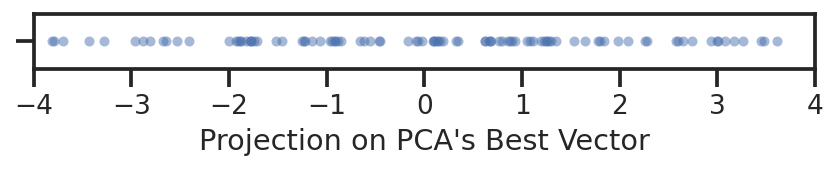

In [ ]:
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=X_pca[:,0], jitter=False, alpha=0.5, ax=ax)
ax.set_xlim(xlim)
ax.set_xlabel("Projection on PCA's Best Vector");

**key idea**: the best projection is the one that maximises (or preserves) the variance of the data; the principle being that it facilitates discriminating data points.

## What the PCA Best Vector Looks Like in the Original Space

### Drawing the PCA Vectors: Just for Illustration; No Need to Understand the Code

In [ ]:
# borrowed from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html#Introducing-Principal-Component-Analysis
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def draw_scatter_and_PCA_vectors(X, pca, ax=None):
    # assumes that X is a numpy array in (x, y) format   
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax)

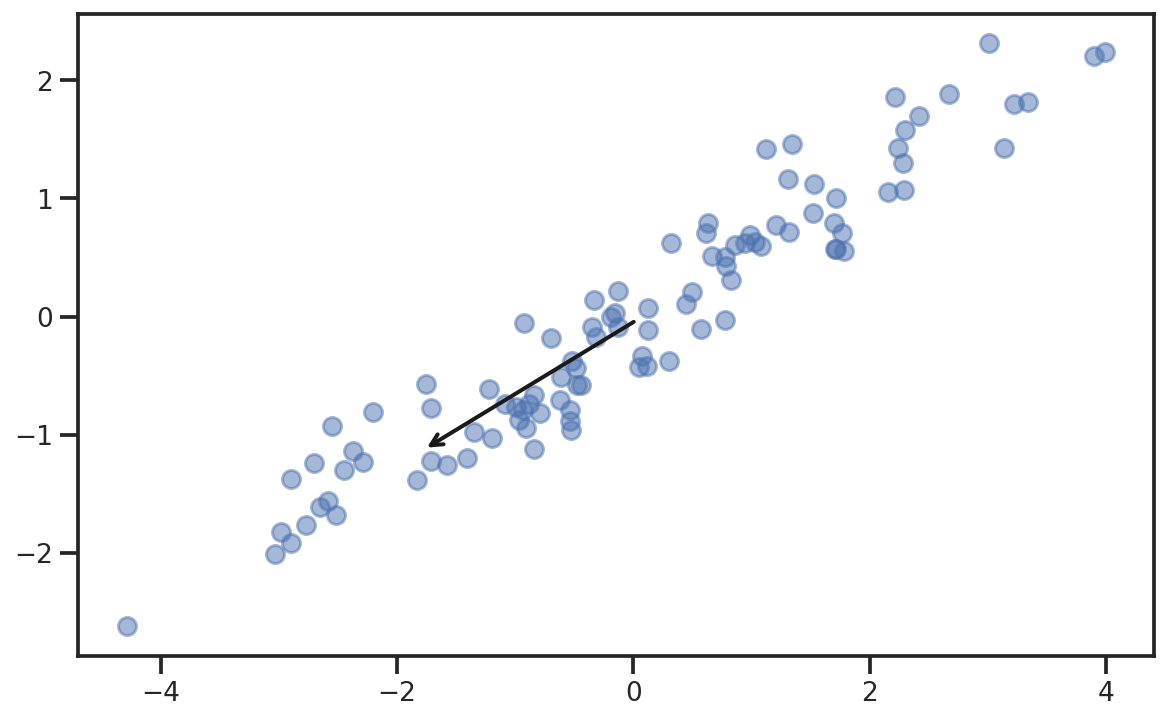

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
draw_scatter_and_PCA_vectors(X.to_numpy(), pca, ax)
ax.set_aspect('equal')

### What does the Projection Look Like in the Original 2D Space?

In [ ]:
pca.components_

array([[-0.85442036, -0.51958238]])

Reverse Engineering the original data from the 1D Version. Not quite... Of course we had to throw some information away when compressed into 1D. All that we know now is the position of the vector (slope, given the proportion of each feature) and the projection of the data points on that vector.

In [ ]:
X_inv_pca = pca.inverse_transform(X_pca)
X_pca.shape, X_inv_pca.shape

((100, 1), (100, 2))

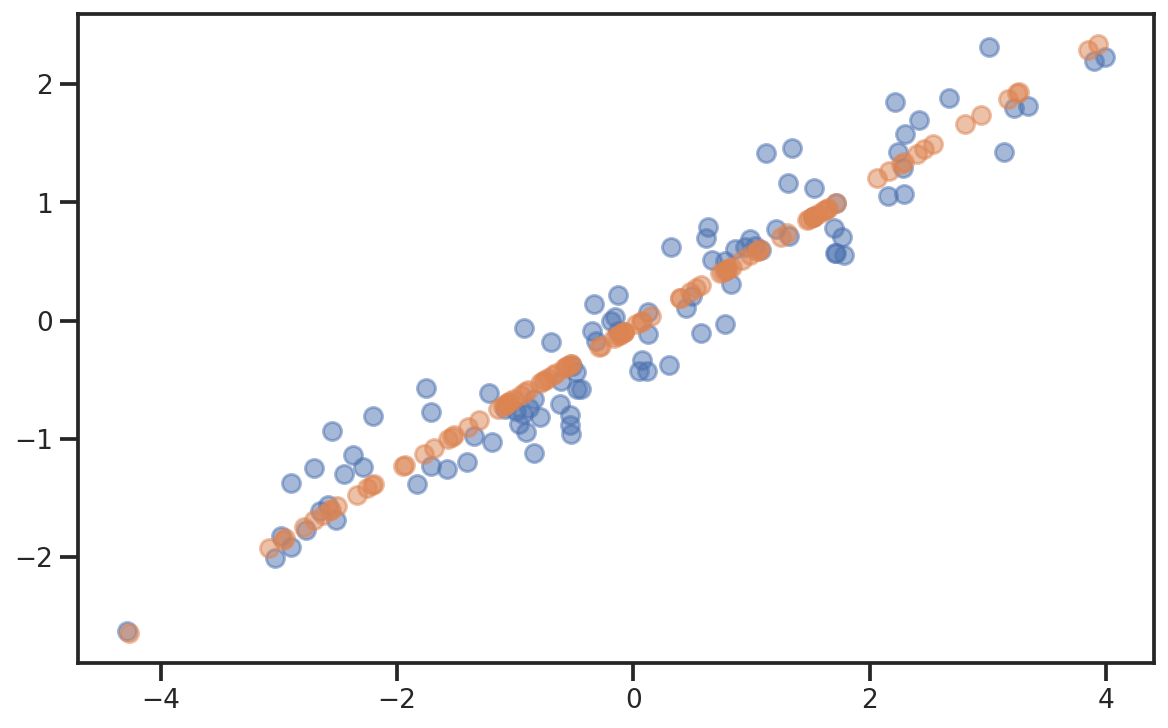

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5)
ax.scatter(X_inv_pca[:, 0], X_inv_pca[:, 1], alpha=0.5);
ax.set_aspect('equal')

## PCA: 2D to 2D, and Ranking of Components

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
§pca.components_

array([[-0.85442036, -0.51958238],
       [-0.51958238,  0.85442036]])

In [ ]:
pca.explained_variance_ratio_

array([0.98332474, 0.01667526])

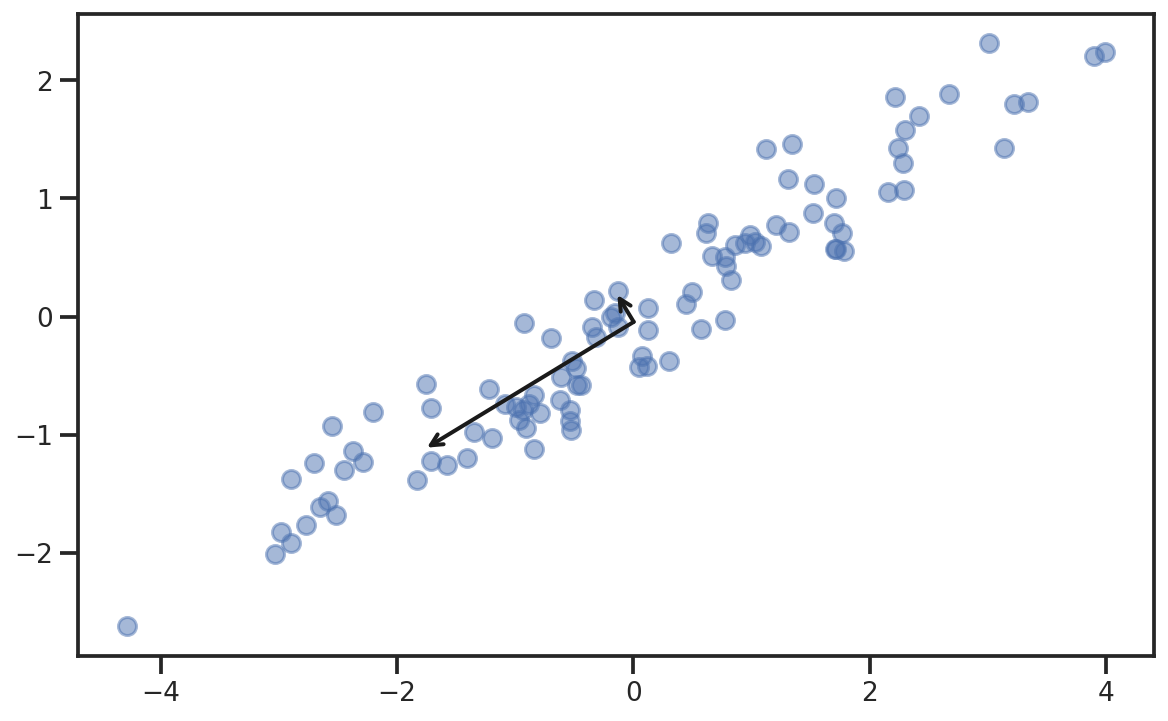

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
draw_scatter_and_PCA_vectors(X.to_numpy(), pca, ax)
ax.set_aspect('equal')

PCA components are orthogonal (i.e., uncorrelated) to one another, and ranked according to their normalised explained variance.

## Breast Cancer Dataset, Larger Set of Features

Adapted from https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb.

Again, there is no need to fully understand the code. What it does is:

* Loads and shows the distribution of the features and their relationship to the cancer diagnoses on the built-in dataset.

* Applies PCA to reduce the dimensionality to two features.

* It turns out that they provide good separation of outcomes.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

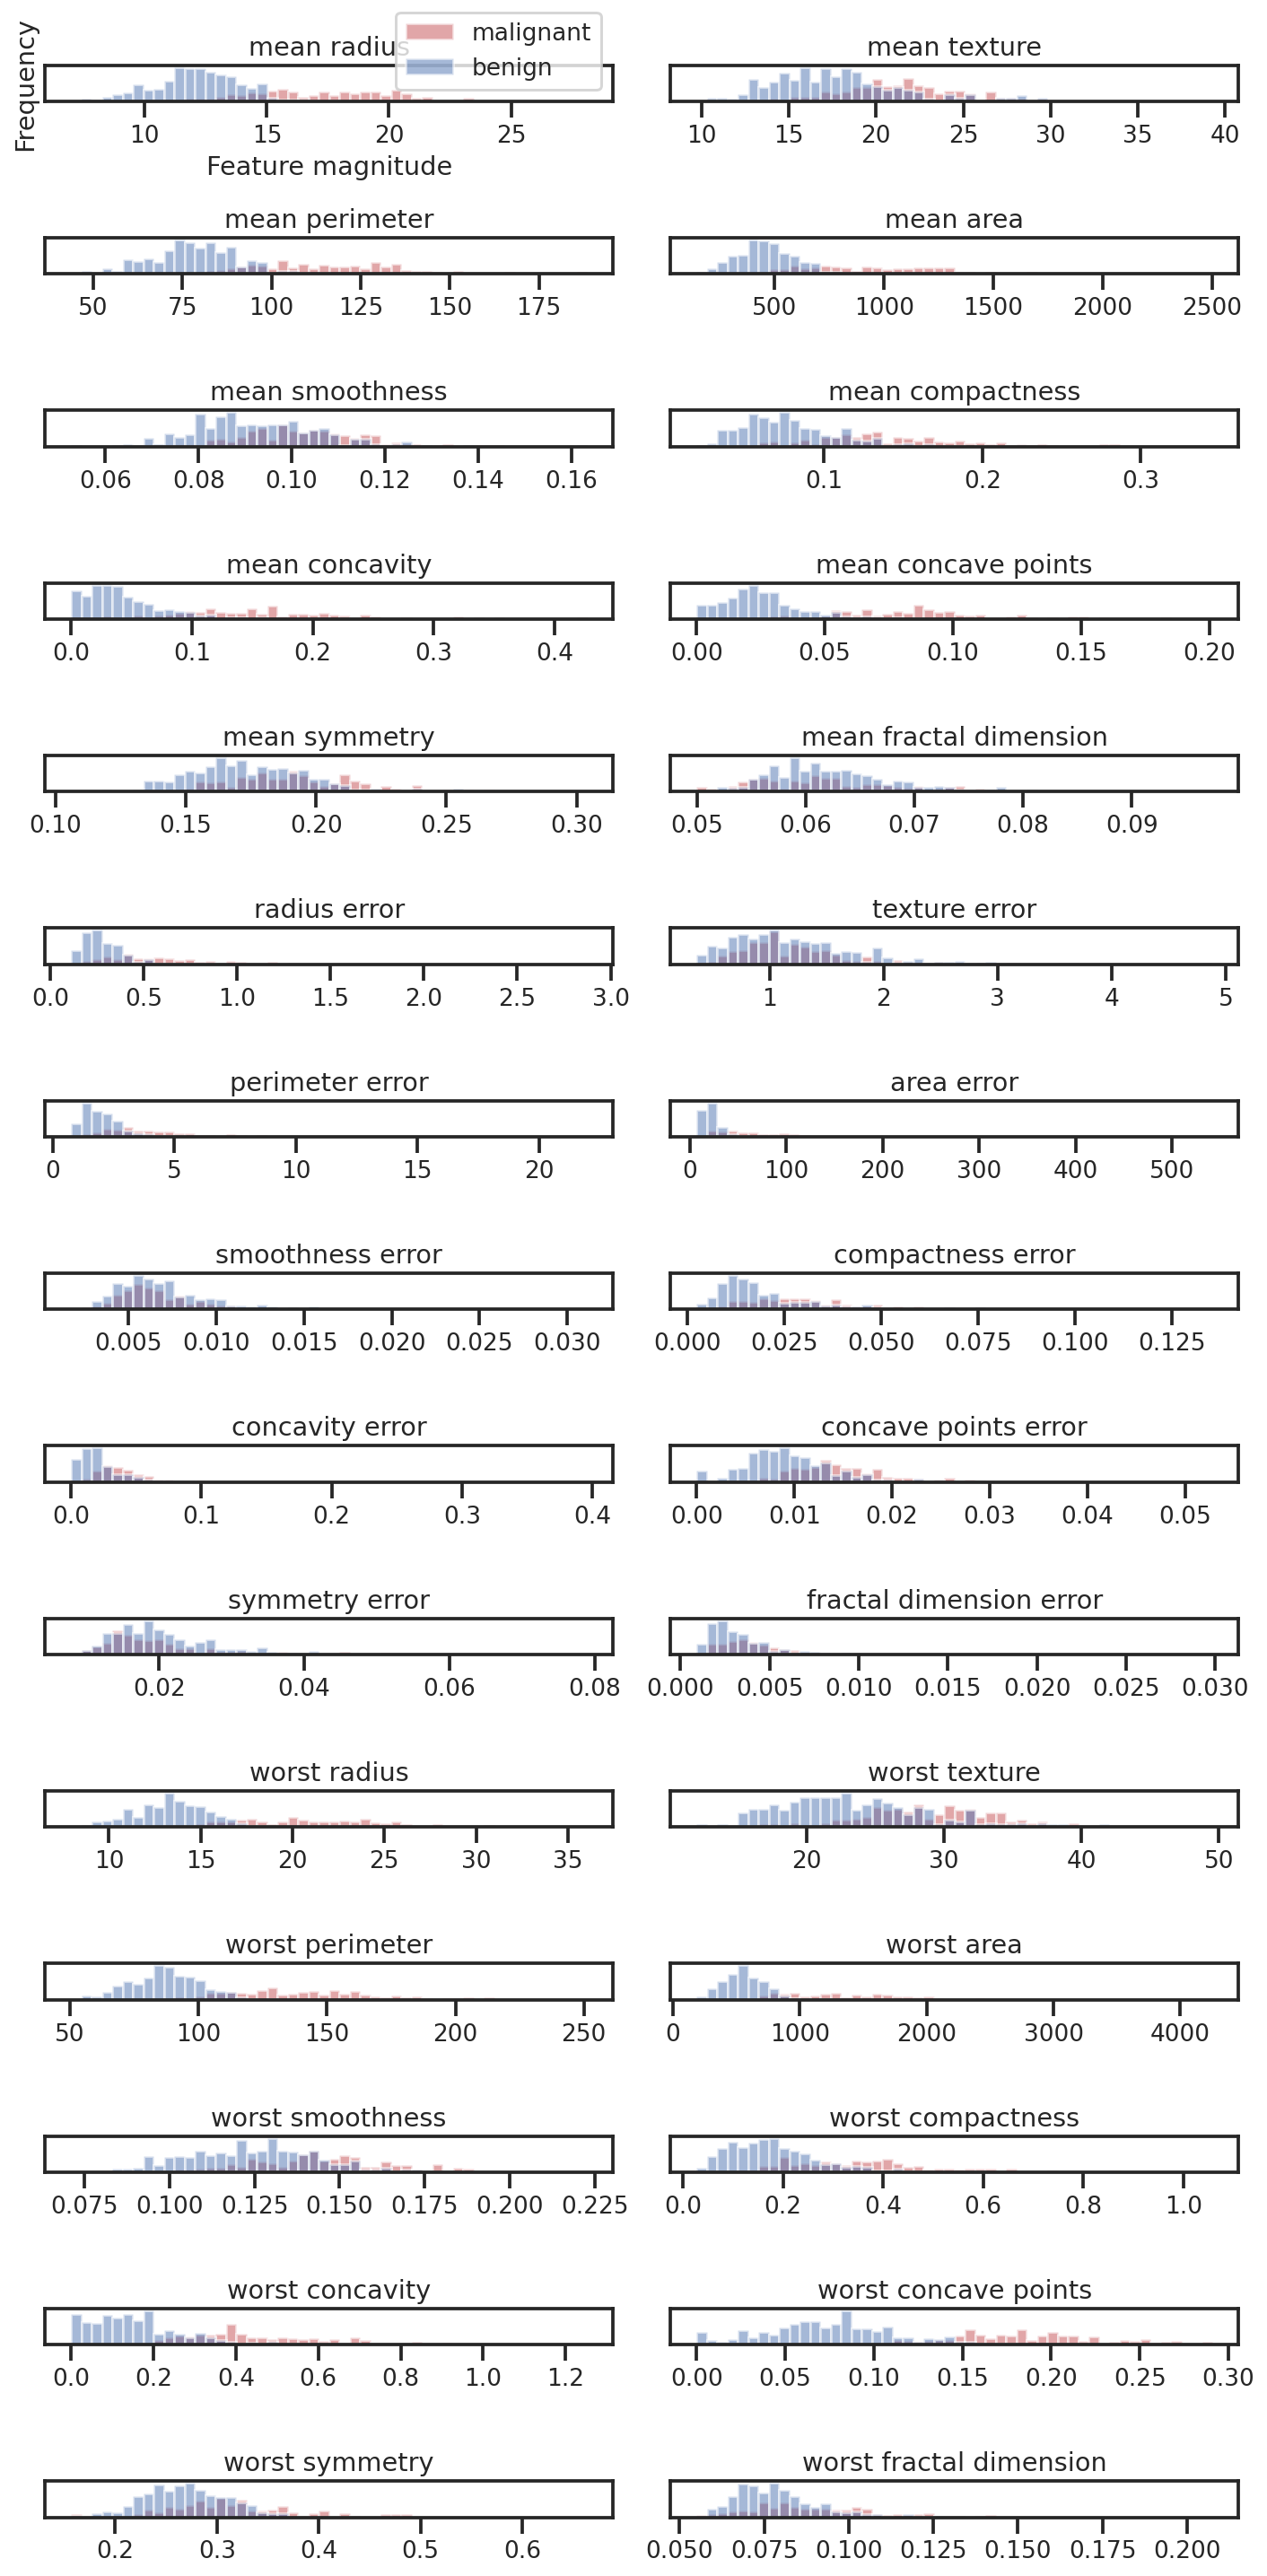

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='b', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [ ]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

malignant_pca = pca.transform(malignant)

Original shape: (569, 30)
Reduced shape: (569, 2)


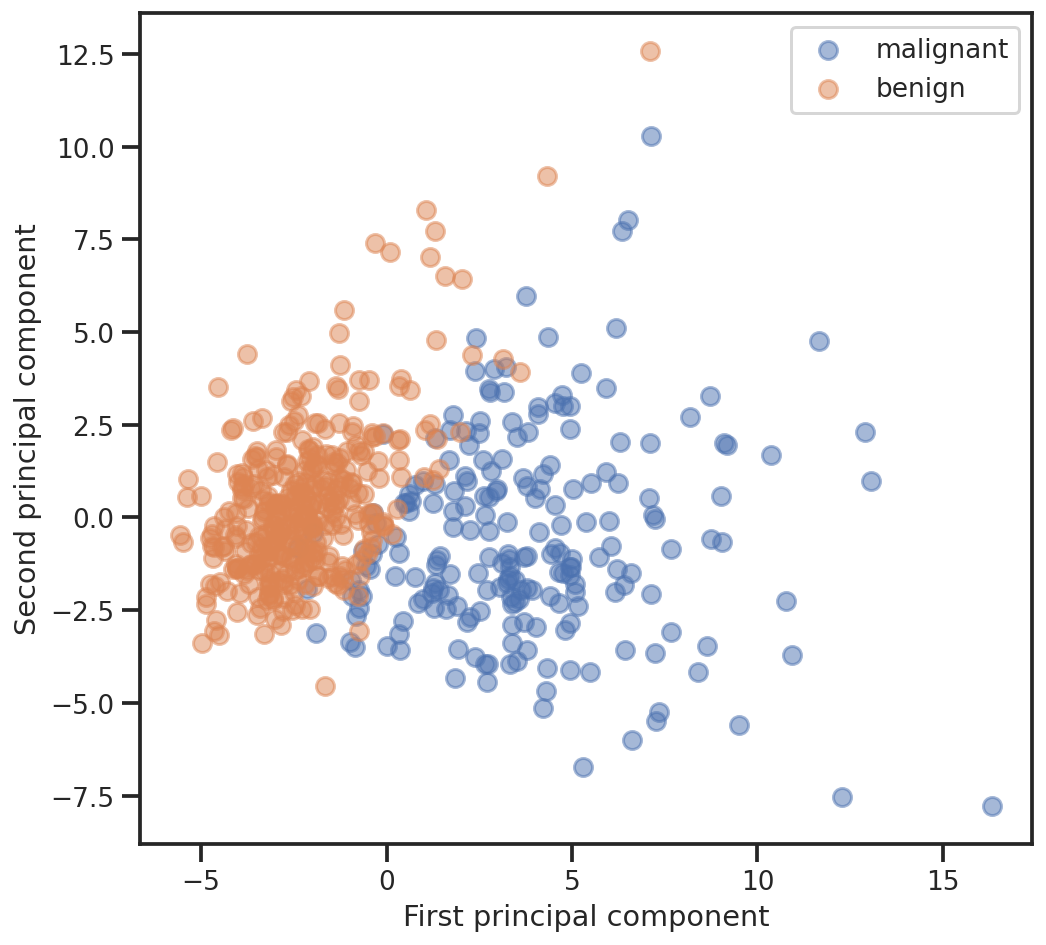

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cancer.target)
plt.scatter(x=X_pca[cancer.target==0][:, 0], y=X_pca[cancer.target==0][:, 1], alpha=0.5)
plt.scatter(x=X_pca[cancer.target==1][:, 0], y=X_pca[cancer.target==1][:, 1], alpha=0.5)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

## Determining a Reasonable Threshold for Number of Principal Components

In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [ ]:
pca_full.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

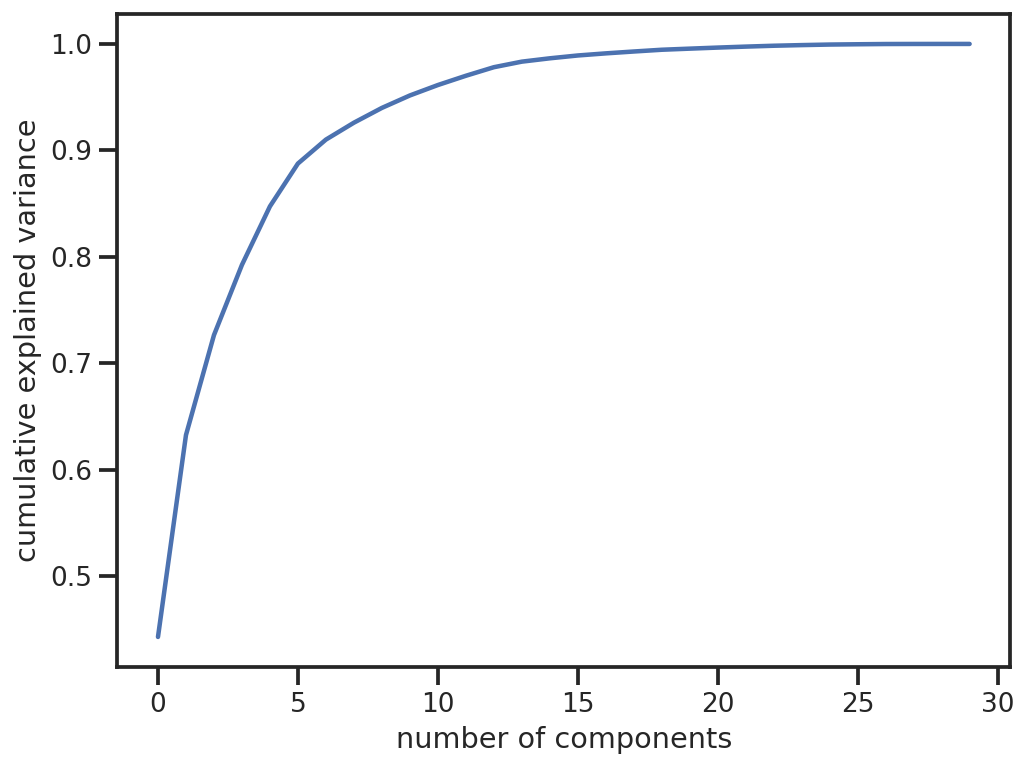

In [ ]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## The Influence of the Features in the Components

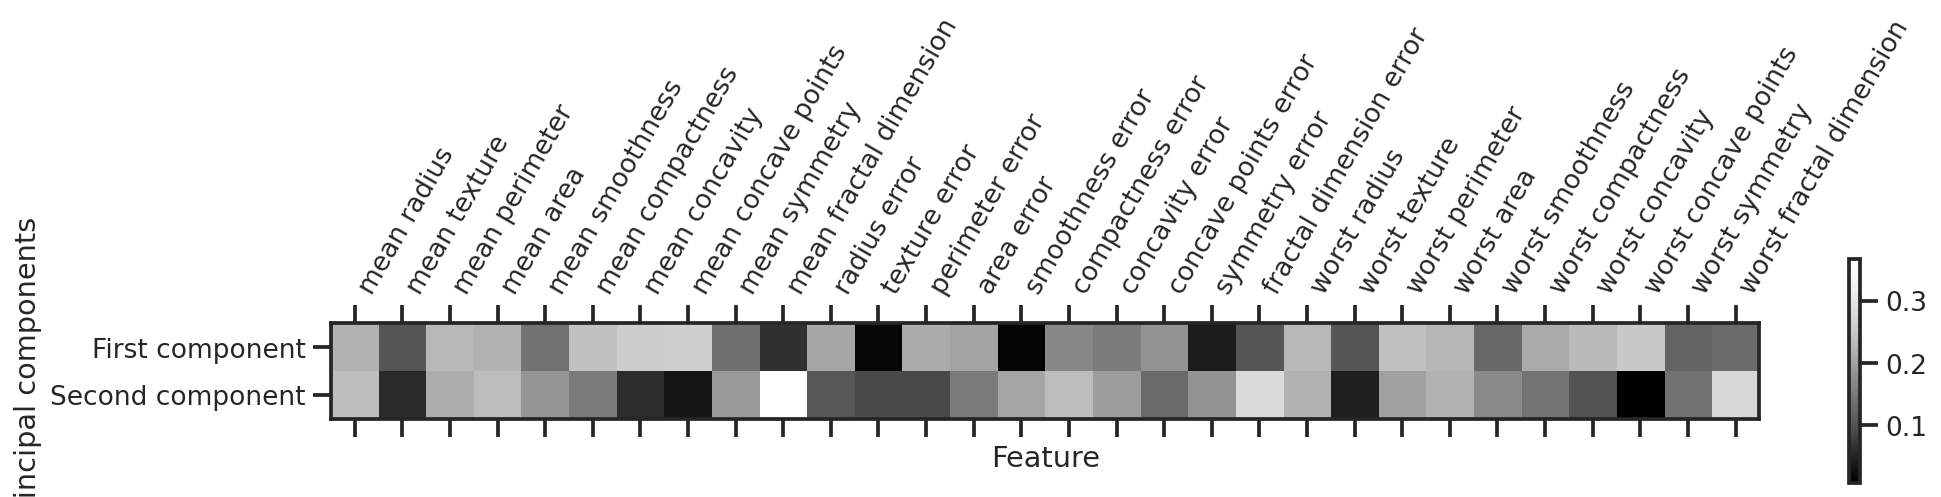

In [ ]:
plt.matshow(np.abs(pca.components_), cmap='Greys_r')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [ ]:
c1_df = pd.Series(pca.components_[0], index=cancer.feature_names)

In [ ]:
c1_df.abs().sort_values(ascending=False)

mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean fractal dimension     0.064363
symmetry error             0

In [ ]:
c2_df = pd.Series(pca.components_[1], index=cancer.feature_names)
c2_df.abs().sort_values(ascending=False)

mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
mean area                  0.231077
worst radius               0.219866
worst area                 0.219352
mean perimeter             0.215181
smoothness error           0.204430
worst perimeter            0.199878
concavity error            0.197207
mean symmetry              0.190349
mean smoothness            0.186113
symmetry error             0.183848
worst smoothness           0.172304
area error                 0.152293
mean compactness           0.151892
worst compactness          0.143593
worst symmetry             0.141883
concave points error       0.130322
radius error               0.105552
worst concavity            0.097964
texture error              0.089980
perimeter error            0.089457
mean concavity             0.060165
mean texture               0.059706
worst texture              0